# VLS Gratings

In [1]:
import sys
import os

# Get absolute path to the real src folder (repo root + src)
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, os.path.join(repo_root, "src"))

import fourieroptics as fo

## Generate Grating

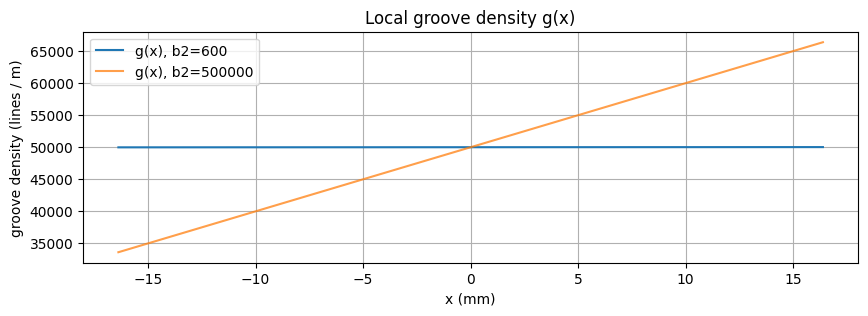

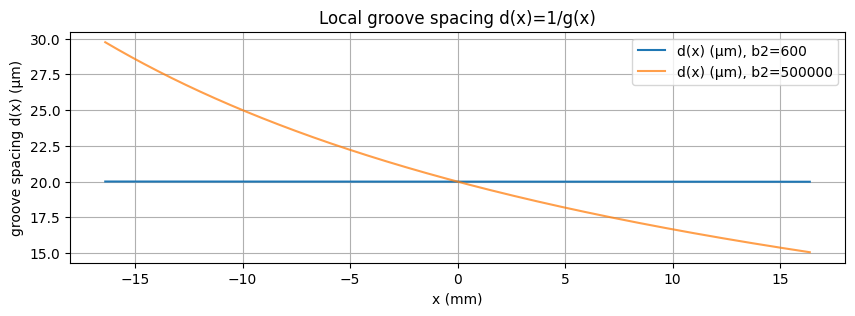

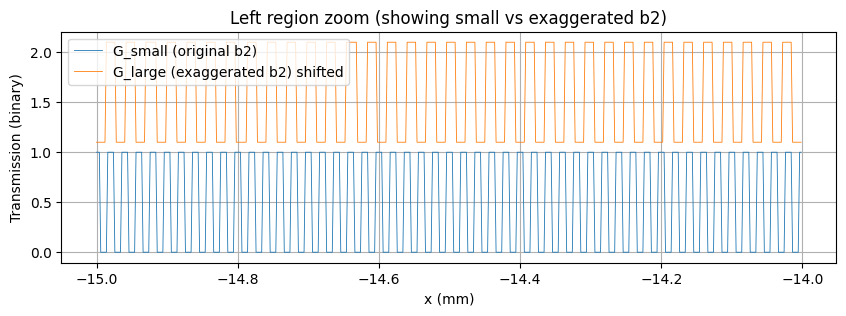

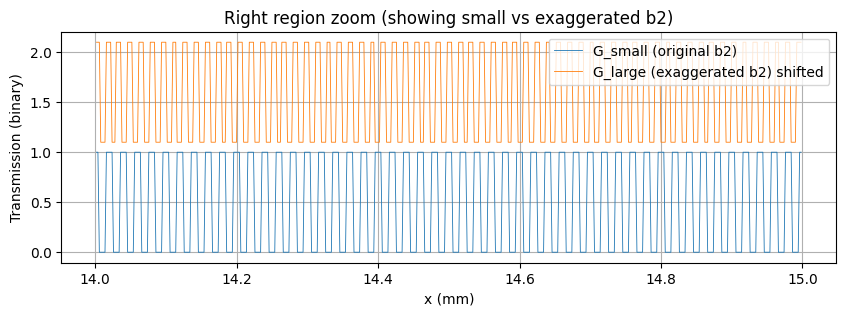

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import fourieroptics as fo   # your package

# grid
N = 2**14
dx = 2e-6
x = fo.coords_1D(N, dx)     # meters

# parameters
g0 = 50e3        # lines / m
b2 = 600         # your original (small) value
b2_large = 5e5   # exaggerate for visualization
b3 = 0.0
b4 = 0.0

# continuous densities
g_small = g0 + 2*b2*x + 3*b3*x**2 + 4*b4*x**3
g_large = g0 + 2*b2_large*x

# local groove spacing
d_small = 1.0 / g_small
d_large = 1.0 / g_large

# plot continuous density and spacing over whole array
plt.figure(figsize=(10,3))
plt.plot(x*1e3, g_small, label=f"g(x), b2={b2:.0f}")
plt.plot(x*1e3, g_large, label=f"g(x), b2={b2_large:.0f}", alpha=0.75)
plt.xlabel("x (mm)")
plt.ylabel("groove density (lines / m)")
plt.title("Local groove density g(x)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,3))
plt.plot(x*1e3, d_small*1e6, label=f"d(x) (µm), b2={b2:.0f}")
plt.plot(x*1e3, d_large*1e6, label=f"d(x) (µm), b2={b2_large:.0f}", alpha=0.75)
plt.xlabel("x (mm)")
plt.ylabel("groove spacing d(x) (µm)")
plt.title("Local groove spacing d(x)=1/g(x)")
plt.legend()
plt.grid(True)
plt.show()

# Generate binary gratings (small and large b2) and zoom to ends:
G_small = fo.vls_grating_1D(x, g0, b2=b2, b3=b3, b4=b4, threshold=0.5)
G_large = fo.vls_grating_1D(x, g0, b2=b2_large, b3=b3, b4=b4, threshold=0.5)

# Choose zoom windows (left and right ends)
left_min_mm, left_max_mm = -15.0, -14.0   # mm
right_min_mm, right_max_mm = 14.0, 15.0   # mm

# convert to indices
def mm_to_idx(x_mm):
    x_m = x*1e3
    return np.searchsorted(x_m, x_mm)

li = mm_to_idx(left_min_mm)
lj = mm_to_idx(left_max_mm)
ri = mm_to_idx(right_min_mm)
rj = mm_to_idx(right_max_mm)

plt.figure(figsize=(10,3))
plt.plot(x[li:lj]*1e3, G_small[li:lj], lw=0.6, label='G_small (original b2)')
plt.plot(x[li:lj]*1e3, G_large[li:lj]+1.1, lw=0.6, label='G_large (exaggerated b2) shifted')
plt.xlabel("x (mm)")
plt.ylabel("Transmission (binary)")
plt.title("Left region zoom (showing small vs exaggerated b2)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,3))
plt.plot(x[ri:rj]*1e3, G_small[ri:rj], lw=0.6, label='G_small (original b2)')
plt.plot(x[ri:rj]*1e3, G_large[ri:rj]+1.1, lw=0.6, label='G_large (exaggerated b2) shifted')
plt.xlabel("x (mm)")
plt.ylabel("Transmission (binary)")
plt.title("Right region zoom (showing small vs exaggerated b2)")
plt.legend()
plt.grid(True)
plt.show()
